In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [5]:
column_names = [
    'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Class'
]


data = pd.read_csv('data/avila-tr.txt', header=None, names=column_names)
data2 = pd.read_csv('data/avila-ts.txt', header=None, names=column_names)
# print(data['F6'], data['F10'])

In [6]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [7]:
from sklearn.preprocessing import StandardScaler

X_train = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']]
y_train = data['Class']

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

X_test = data2[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']]
y_test = data2['Class']

X_test = scalar.transform(X_test)

y_train.value_counts()



Class
A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: count, dtype: int64

In [14]:
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.99      1.00      0.99      4286
           B       1.00      0.80      0.89         5
           C       0.97      0.99      0.98       103
           D       1.00      1.00      1.00       353
           E       0.99      0.99      0.99      1095
           F       1.00      0.99      0.99      1962
           G       0.99      0.99      0.99       447
           H       1.00      0.99      1.00       520
           I       1.00      1.00      1.00       832
           W       1.00      1.00      1.00        45
           X       0.99      0.99      0.99       522
           Y       1.00      1.00      1.00       267

    accuracy                           0.99     10437
   macro avg       0.99      0.98      0.99     10437
weighted avg       0.99      0.99      0.99     10437

Confusion Matrix:
[[4276    0    0    0    1    7    1    1    0    0    0    0]
 [   1    4    0    0    0   

In [19]:
importances = model.feature_importances_

print(importances)

[0.1771713  0.18435017 0.1537128  0.16007271 0.14659406 0.02377214
 0.04207929 0.02179119 0.0677521  0.02270424]


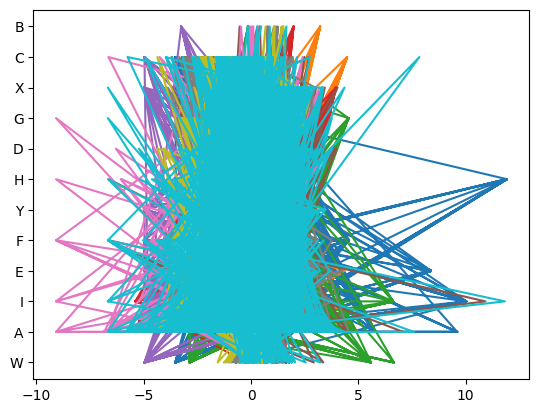

In [13]:
plt.plot(X_test, y_test)
plt.show()